In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.gridspec as gridspec
from sklearn.metrics import r2_score, mean_squared_error
import math

params = {'legend.fontsize': '10',
          'figure.figsize': (10, 4),
          'legend.shadow': True,
          'legend.framealpha': None,
          'legend.fancybox': True,
          'axes.labelsize': 'x-large',
          'axes.labelweight': 'bold',
          'axes.titlesize':'x-large',
          'axes.labelweight': 'bold',
          'axes.titleweight': 'bold',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'lines.linewidth': 1.2,}
pylab.rcParams.update(params)

In [ ]:
arquivo = open('/content/dados_2.csv','r')

tags = pd.read_csv('/content/dados_2.csv',  sep=';', squeeze=True)
tags = pd.DataFrame(tags)
len(tags)

In [3]:
df = tags
time = pd.to_timedelta(df['10/07/2021'])/pd.offsets.Minute(1)

rmse_tempsaida_malha1 = math.sqrt(mean_squared_error(df['tempsaida_sp.out'],df['tempsaida_pv.out']))
rmse_tempsaida_malha2 = math.sqrt(mean_squared_error(df['tempsaida_sp.out'],df['tempsaida_pv2.out']))

MediaConsumoGas_malha1 = df['vazao_gas_out.out'].sum()/len(df['vazao_gas_out.out'])
MediaConsumoGas_malha2 = df['vazao_gas_out2.out'].sum()/len(df['vazao_gas_out2.out'])
MediaVE21_malha1 = df['vazao_ve21_in.out'].sum()/len(df['vazao_gas_out2.out'])
MediaVE21_malha2 = df['vazao_ve21_in2.out'].sum()/len(df['vazao_gas_out2.out'])

ConsumoGas_malha1 = MediaConsumoGas_malha1*time.max()/60
ConsumoGas_malha2 = MediaConsumoGas_malha2*time.max()/60

ConsumoVE21_malha1 = MediaVE21_malha1*time.max()/60
ConsumoVE21_malha2 = MediaVE21_malha2*time.max()/60

rmse_tempcv_malha1 = math.sqrt(mean_squared_error(df['tempcv_sp.out'], df['tempcv_pv.out']))
rmse_tempcv_malha2 = math.sqrt(mean_squared_error(df['tempcv_sp.out'], df['tempcv_pv2.out']))

tempcv_offlimit_time = df['tempcv_pv2.out'].loc[df['tempcv_pv2.out'] > 750].count()/60
tempe_offlimit_time = df['tempe_pv2.out'].loc[df['tempe_pv2.out'] < 85].count()/60
tempcl_offlimite_time = df['tempcl_pv2.out'].loc[df['tempcl_pv2.out'] < 100].count()/60
tempcl_offlimite_time2 = df['tempcl_pv.out'].loc[df['tempcl_pv.out'] < 100].count()/60

dvp_tempe_malha1 = df['tempe_pv.out'].std()
dvp_tempe_malha2 = df['tempe_pv2.out'].std()

dvp_gas_malha1 = df['vazao_gas_out.out'].std()
dvp_gas_malha2 = df['vazao_gas_out2.out'].std()

dvp_ve21_malha1 = df['vazao_ve21_in.out'].std()
dvp_ve21_malha2 = df['vazao_ve21_in2.out'].std()

dvp_tempsaida_malha1 = df['tempsaida_pv.out'].std()
dvp_tempsaida_malha2 = df['tempsaida_pv2.out'].std()

dvp_tempcv_malha1 = df['tempcv_pv.out'].std()
dvp_tempcv_malha2 = df['tempcv_pv2.out'].std()

dvp_tempcl_malha1 = df['tempcl_pv.out'].std()
dvp_tempcl_malha2 = df['tempcl_pv2.out'].std()

results = {
    'Erro Quadrático Médio' : [rmse_tempsaida_malha1, rmse_tempsaida_malha2, rmse_tempcv_malha1, rmse_tempcv_malha2], 
    'Consumo de gás' : [ConsumoGas_malha1, ConsumoGas_malha2, '', ''],
    'Tempo_off_limite_malha_2' : [tempcv_offlimit_time, tempe_offlimit_time, tempcl_offlimite_time, '']
    }

results = pd.DataFrame(results)
results.index = ['malha1', 'malha 2','malha 1','malha 2']

print('tmp entrada', dvp_tempe_malha1, dvp_tempe_malha2)
print('ve21', dvp_ve21_malha1, dvp_ve21_malha2)
print('temp saida',dvp_tempsaida_malha1, dvp_tempsaida_malha2)
print('temp cl', dvp_tempcl_malha1, dvp_tempcl_malha2)
print('temp cv', dvp_tempcv_malha1, dvp_tempcv_malha2)
print('vazão gás', dvp_gas_malha1, dvp_gas_malha2)

tmp entrada 31.883660606842678 42.12199091118373
ve21 3732.873772611797 4523.396544192874
temp saida 27.418292698339464 40.47181530967912
temp cl 47.32137888889404 54.064605141008094
temp cv 4.11556310824988 48.44839543679299
vazão gás 132.2775371520208 233.04532691311167


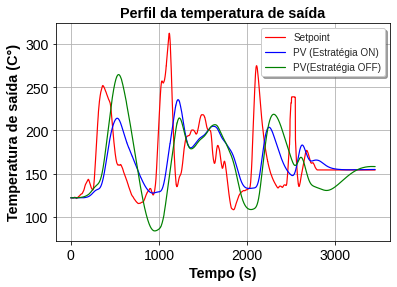

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.style.use('seaborn-whitegrid')
df['tempsaida_sp.out'].plot( 
    title='Perfil da temperatura de saída', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura de saída (C°)',
    fontsize = 14,
    grid = True,
    color = 'red')
df['tempsaida_pv.out'].plot( 
    color = 'blue')
df['tempsaida_pv2.out'].plot( 
    color = 'green')
axes.legend(['Setpoint', 'PV (Estratégia ON)', 'PV(Estratégia OFF)'], frameon = True)
plt.savefig('tempsaida.png', bbox_inches='tight', dpi =1200)

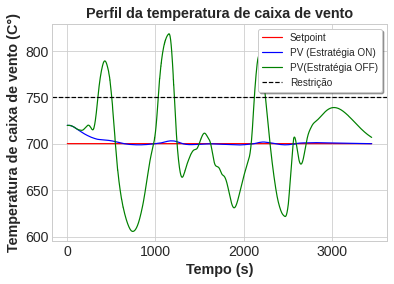

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.style.use('seaborn-whitegrid')
df['tempcv_sp.out'].plot( 
    title='Perfil da temperatura de caixa de vento', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura de caixa de vento (C°)',
    fontsize = 14,
    grid = True,
    color = 'red')
df['tempcv_pv.out'].plot( 
    color = 'blue')
df['tempcv_pv2.out'].plot( 
    color = 'green')
plt.axhline(y=750, color='black', linestyle='--')
axes.legend(['Setpoint', 'PV (Estratégia ON)', 'PV(Estratégia OFF)', 'Restrição'], frameon = True)
plt.savefig('tempcv.png', bbox_inches='tight', dpi =1200)

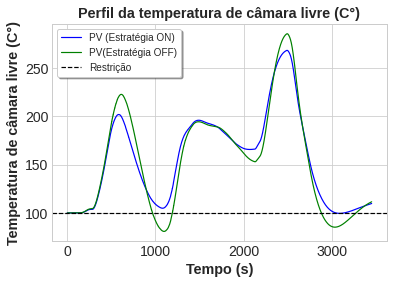

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.style.use('seaborn-whitegrid')
df['tempcl_pv.out'].plot( 
    title='Perfil da temperatura de câmara livre (C°)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura de câmara livre (C°)',
    fontsize = 14,
    grid = True,
    color = 'blue')
df['tempcl_pv2.out'].plot( 
    color = 'green')
plt.axhline(y=100, color='black', linestyle='--')
axes.legend(['PV (Estratégia ON)', 'PV(Estratégia OFF)', 'Restrição'], frameon = True, loc = 2)
plt.savefig('tempcl.png', bbox_inches='tight', dpi =1200)

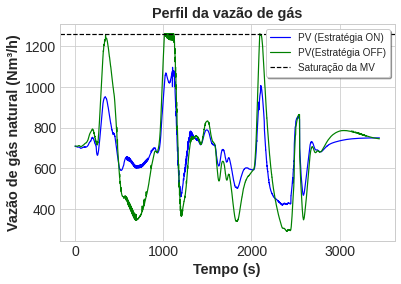

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.style.use('seaborn-whitegrid')
df['vazao_gas_out.out'].plot( 
    title='Perfil da vazão de gás', 
    xlabel = 'Tempo (s)',
    ylabel = 'Vazão de gás natural (Nm³/h)',
    fontsize = 14,
    grid = True,
    color = 'blue')
df['vazao_gas_out2.out'].plot( 
    color = 'green')
plt.axhline(y=1260, color='black', linestyle='--')
axes.legend(['PV (Estratégia ON)', 'PV(Estratégia OFF)', 'Saturação da MV'], frameon = True)
plt.savefig('tempgas.png', bbox_inches='tight', dpi =1200)

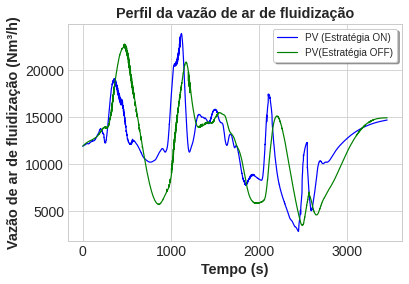

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.style.use('seaborn-whitegrid')
df['vazao_ve21_out.out'].plot( 
    title='Perfil da vazão de ar de fluidização', 
    xlabel = 'Tempo (s)',
    ylabel = 'Vazão de ar de fluidização (Nm³/h)',
    fontsize = 14,
    grid = True,
    color = 'blue')
df['vazao_ve21_out2.out'].plot( 
    color = 'green')
axes.legend(['PV (Estratégia ON)', 'PV(Estratégia OFF)', 'Saturação'], frameon = True)
plt.savefig('ve21.png', bbox_inches='tight', dpi =1200)

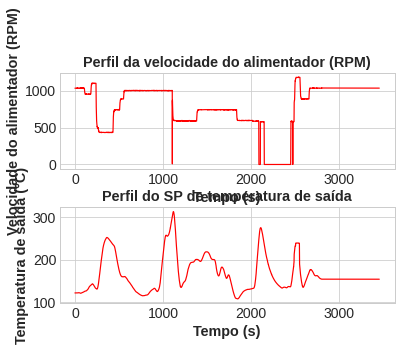

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.style.use('seaborn-whitegrid')
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.4)
ax1 = df['vel_alim_out.out'].plot(
    ax = axes[0],
    title ='Perfil da velocidade do alimentador (RPM)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Velocidade do alimentador (RPM)',
    fontsize = 14,
    grid = True,
    color = 'red')

ax2 = df['tempsaida_sp.out'].plot(
    ax = axes[1],
    title ='Perfil do SP de temperatura de saída', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura de saída (°C)',
    fontsize = 14,
    grid = True,
    color = 'red')
plt.savefig('perfis.png', bbox_inches='tight', dpi =1200)

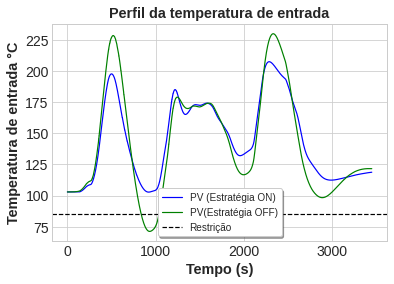

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.style.use('seaborn-whitegrid')
df['tempe_pv.out'].plot( 
    title='Perfil da temperatura de entrada', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura de entrada °C',
    fontsize = 14,
    grid = True,
    color = 'blue')
df['tempe_pv2.out'].plot( 
    color = 'green')
plt.axhline(y=85, color='black', linestyle='--')
axes.legend(['PV (Estratégia ON)', 'PV(Estratégia OFF)', 'Restrição'], frameon = True)
plt.savefig('tempe.png', bbox_inches='tight', dpi =1200)

In [11]:
pylab.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'ax